In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
from sklearn.datasets import load_boston
data = load_boston()

In [5]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
boston = pd.DataFrame(data.data, columns = data.feature_names)

In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston['MEDV']= data.target

In [12]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
X = boston.drop('MEDV', axis=1)
y = boston.MEDV

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [16]:
X_train.shape

(430, 13)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_train_predict = regressor.predict(X_train)

In [30]:
# checking the error between y_train and y_train_prediction by using mean_square_error
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))

print('The model performance for the Training Set')
print('RMSE is {}'.format(rmse))

The model performance for the Training Set
RMSE is 4.491317271151689


In [31]:
# On Testing set
y_test_predict = regressor.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

print('The model performance for the Testing Set')
print('RMSE is {}'.format(rmse))

The model performance for the Testing Set
RMSE is 5.755030991077915


Text(0, 0.5, 'Predicted')

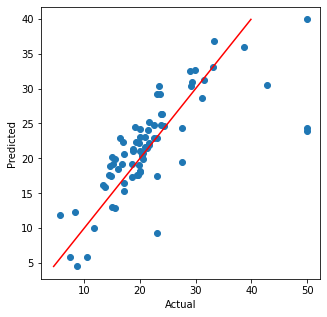

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_test_predict)
plt.plot([min(y_test_predict), max(y_test_predict)],[min(y_test_predict), max(y_test_predict)], color="red")
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [41]:
from sklearn.metrics import r2_score
print("Accuracy of Model of Testing set = {}".format(r2_score(y_test, y_test_predict)*100))

Accuracy of Model of Testing set = 55.8260920447819


In [43]:
print("Accuracy of Model of Training set = {}".format(r2_score(y_train, y_train_predict)*100))

Accuracy of Model of Training set = 76.53500856691595
